##Visualizing Chipotle's Data

Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).


Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
chipo.set_index('order_id', inplace=True)

In [5]:
chipo

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,Izze,[Clementine],$3.39
1,1,Nantucket Nectar,[Apple],$3.39
1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...
1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25


Step 5. Create a histogram of the top 5 items bought

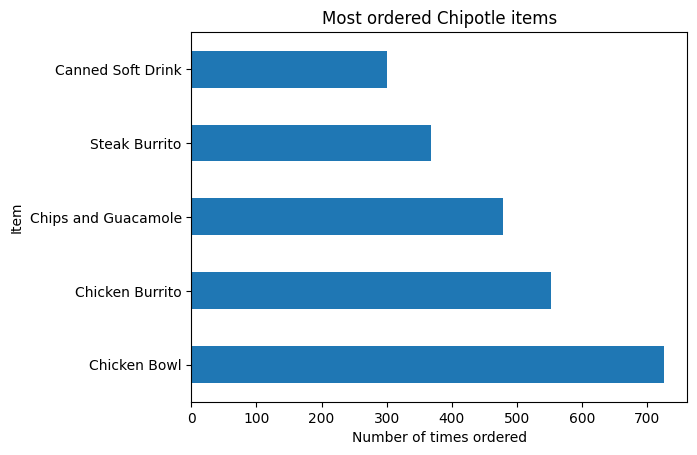

In [6]:
#count the values and sort them (this replaces the counter and manual sorting/ slicing)
#The result is a pandas series sorted descending by count
top_5 = chipo['item_name'].value_counts().head(5)
top_5.plot(kind='barh')

plt.title('Most ordered Chipotle items')
plt.xlabel('Number of times ordered')
plt.ylabel('Item')
plt.show()


Step 6. Create a scatterplot with the number of items orderered per order price

Hint: Price should be in the X-axis and Items ordered in the Y-axis

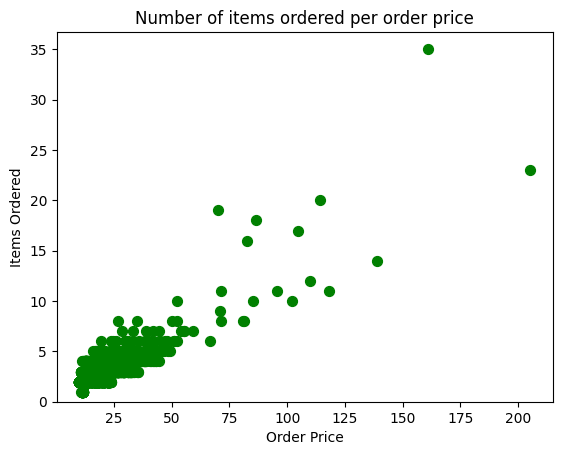

In [7]:
# 1. Clean the price column using vectorized string methods (more robust than slicing)
chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)
# 2. Group by order_id and sum (same as before, this is already modern Pandas)
orders = chipo.groupby('order_id').sum()

# 3. Create the scatterplot
plt.scatter(x=orders.item_price, y=orders.quantity, s=50, c='green')
plt.xlabel('Order Price')
plt.ylabel('Items Ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
plt.show()

##Online Retails Purchase


Introduction:

Step 1. Import the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

sns.set(style="darkgrid")

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv).

Step 3. Assign it to a variable called online_rt

Note: if you receive a utf-8 decode error, set encoding = 'latin1' in pd.read_csv().

In [9]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding='latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

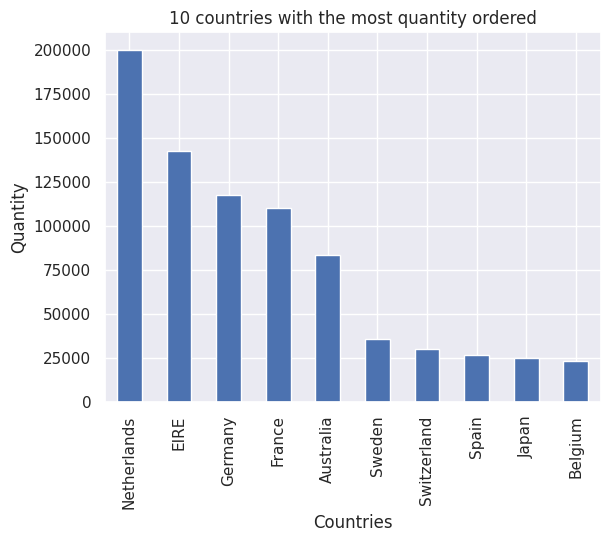

In [10]:
countries = online_rt.groupby('Country')['Quantity'].sum()
countries = countries.sort_values(ascending=False)[1:11]
countries.plot(kind='bar')

plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 countries with the most quantity ordered')
plt.show()
#

Step 5. Exclude negative Quantity entries


In [11]:
online_rt = online_rt[online_rt.Quantity>0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [12]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
top_countries = ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers['Country'].isin(top_countries)]
customers.head()

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,Country,,,,,,,
12426.0,Germany,5549855549855549855549855549855549855549855549...,2066520963714592255122554225552241422365223662...,RED RETROSPOT PURSE APPLE BATH SPONGEHANGING J...,258,5/29/11 12:265/29/11 12:265/29/11 12:265/29/11...,118.09,Germany
12427.0,Germany,5368615368615368615368615368615368615368615368...,221492207721249226362263422301223002132821329P...,FELTCRAFT 6 FLOWER FRIENDS6 RIBBONS RUSTIC CHA...,533,12/3/10 10:4412/3/10 10:4412/3/10 10:4412/3/10...,142.26,Germany
12468.0,Germany,5423715423715423715423715423715423715423715423...,2295721880218832250422898219762255422556620182...,SET 3 PAPER VINTAGE CHICK PAPER EGGRED RETROSP...,366,1/27/11 13:291/27/11 13:291/27/11 13:291/27/11...,133.57,Germany
12471.0,Germany,5381745381745381745381745381745381745381745381...,2121021212215782170016235217312178721232220772...,SET OF 72 RETROSPOT PAPER DOILIESPACK OF 72 R...,8212,12/10/10 9:3512/10/10 9:3512/10/10 9:3512/10/1...,1978.17,Germany
12472.0,Germany,5372015372015372015372015372015372015372015372...,2278122865229602296122962229632296422972229732...,GUMBALL MAGAZINE RACKHAND WARMER OWL DESIGNJAM...,4148,12/5/10 14:1912/5/10 14:1912/5/10 14:1912/5/10...,812.81,Germany


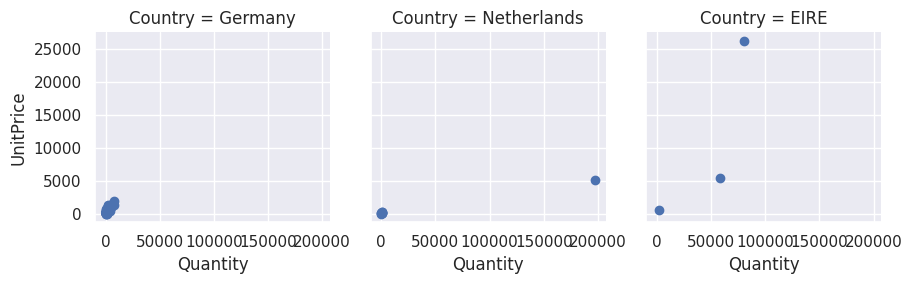

In [13]:
g = sns.FacetGrid(customers, col='Country')
g.map(plt.scatter, 'Quantity', 'UnitPrice', alpha=1)
g.add_legend()

Step 7. Investigate why the previous results look so uninformative.
This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

In [14]:
del customers['InvoiceNo']
customers.head()

,,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,Country,,,,,,
12426.0,Germany,2066520963714592255122554225552241422365223662...,RED RETROSPOT PURSE APPLE BATH SPONGEHANGING J...,258,5/29/11 12:265/29/11 12:265/29/11 12:265/29/11...,118.09,Germany
12427.0,Germany,221492207721249226362263422301223002132821329P...,FELTCRAFT 6 FLOWER FRIENDS6 RIBBONS RUSTIC CHA...,533,12/3/10 10:4412/3/10 10:4412/3/10 10:4412/3/10...,142.26,Germany
12468.0,Germany,2295721880218832250422898219762255422556620182...,SET 3 PAPER VINTAGE CHICK PAPER EGGRED RETROSP...,366,1/27/11 13:291/27/11 13:291/27/11 13:291/27/11...,133.57,Germany
12471.0,Germany,2121021212215782170016235217312178721232220772...,SET OF 72 RETROSPOT PAPER DOILIESPACK OF 72 R...,8212,12/10/10 9:3512/10/10 9:3512/10/10 9:3512/10/1...,1978.17,Germany
12472.0,Germany,2278122865229602296122962229632296422972229732...,GUMBALL MAGAZINE RACKHAND WARMER OWL DESIGNJAM...,4148,12/5/10 14:1912/5/10 14:1912/5/10 14:1912/5/10...,812.81,Germany


Step 7.1.1 Display the first few rows of that DataFrame.


In [15]:
customers = online_rt.groupby(['CustomerID', 'Country'])[['Quantity', 'UnitPrice']].sum().head()
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


Step 7.1.2 Think about what that piece of code does and display the dtype of UnitPrice


In [16]:
print(customers['UnitPrice'].dtype)

float64


Step 7.1.3 Pull data from online_rtfor CustomerIDs 12346.0 and 12347.0.


In [17]:
customer_data = online_rt[online_rt['CustomerID'].isin([12346.0, 12347.0])]
customer_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


Step 7.2 Reinterpreting the initial problem.
To reiterate the question that we were dealing with:
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations. We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries. Or we could do one plot per country. To keep things consistent with the rest of the exercise, let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves: Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue). This exercise goes for sales volume, so let's stick to that.


Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [18]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)
top_3 = sales_volume.index[1:4]
top_3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

Step 7.2.2
Now that we have the top 3 countries, we can focus on the rest of the problem:
"Quantity per UnitPrice by CustomerID".
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total Quantity for each customer.
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

Step 7.3 Modify, select and plot data

Step 7.3.1 Add a column to online_rt called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [19]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


Step 7.3.2 Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.


In [20]:
grouped = online_rt[online_rt.Country.isin(top_3)].groupby(['CustomerID', 'Country'])

In [21]:
plottable = (
    online_rt[online_rt.Country.isin(top_3)]
    .groupby(['CustomerID', 'Country'])[['Quantity', 'Revenue']]
    .sum()
    .assign(AvgPrice=lambda df: df.Revenue / df.Quantity)
)
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


Step 7.3.3 Plot


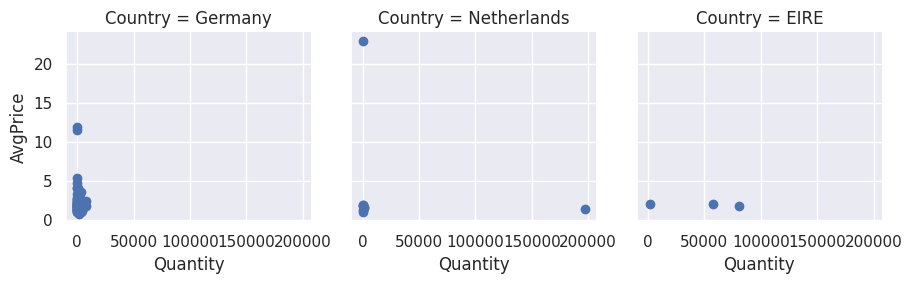

In [22]:
g = sns.FacetGrid(plottable, col='Country')
g.map(plt.scatter, 'Quantity', 'AvgPrice', alpha=1)
g.add_legend()

Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair! There are two things to realize:

The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.
So: we should plot the data regardless of Country and hopefully see a less scattered graph.

Step 7.4.1 Plot the data for each CustomerID on a single graph

In [23]:
plottable = (
online_rt.groupby(['CustomerID'])[['Quantity','Revenue']].sum()
.assign(AvgPrice = lambda df : df.Revenue / df.Quantity)
)


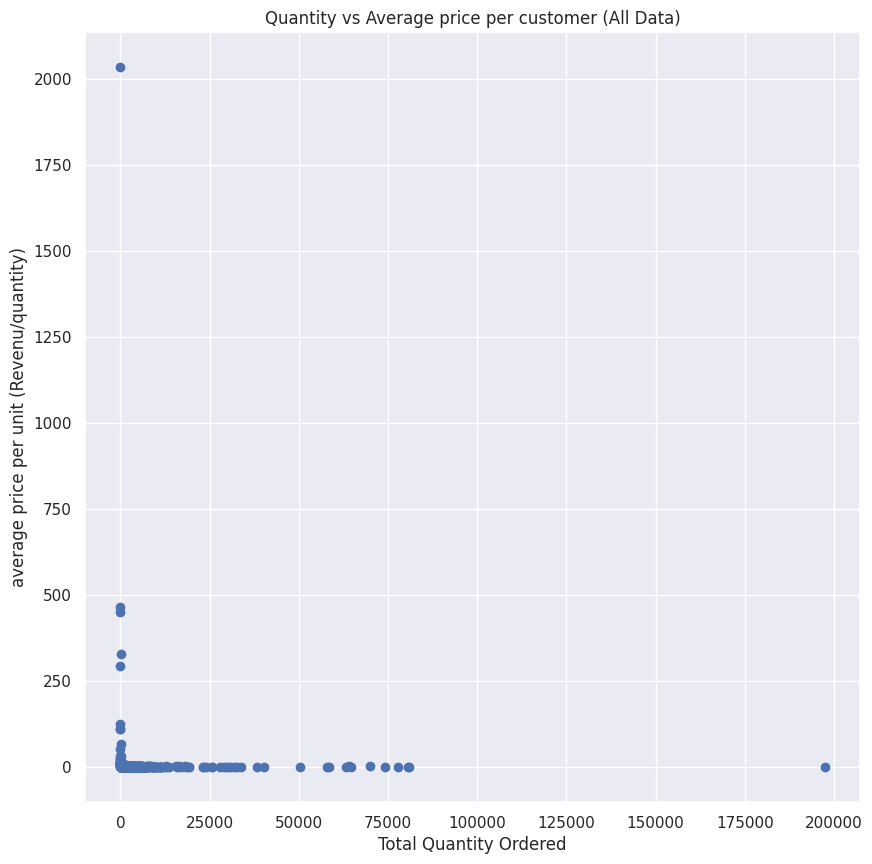

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(x=plottable.Quantity, y=plottable.AvgPrice)
plt.title('Quantity vs Average price per customer (All Data)')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('average price per unit (Revenu/quantity)')
plt.show()

Step 7.4.2 Zoom in so we can see that curve more clearly

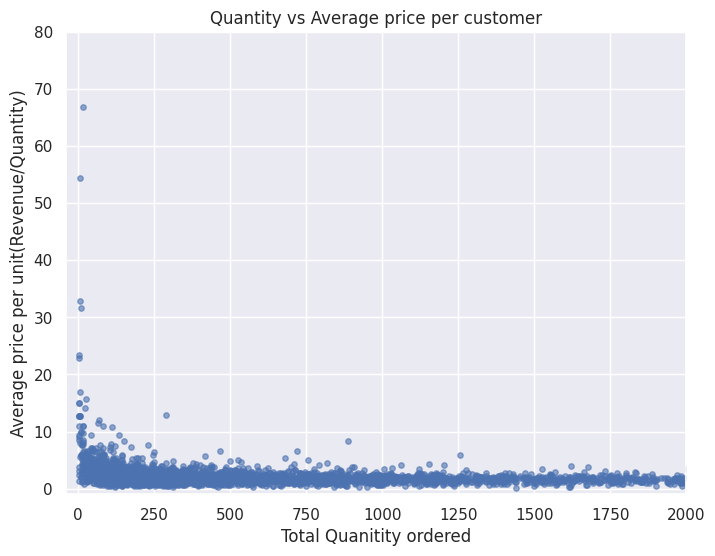

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(plottable.Quantity, plottable.AvgPrice, alpha=0.6, s=15)
plt.xlim(-40, 2000)
plt.ylim(-1, 80)
plt.title('Quantity vs Average price per customer')
plt.xlabel('Total Quanitity ordered')
plt.ylabel('Average price per unit(Revenue/Quantity)')
plt.show()

8. Plot a line chart showing revenue (y) per UnitPrice (x).
Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses. But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

8.1 Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue.

In [26]:
price_start = 0
price_end = 50
price_interval = 1
buckets = np.arange(price_start, price_end, price_interval)
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()
# quantity_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Quantity.sum()

/tmp/ipython-input-242245932.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()


,Revenue
UnitPrice,
"(0, 1]",1107774.544
"(1, 2]",2691765.110
"(2, 3]",2024143.090
"(3, 4]",865101.780
"(4, 5]",1219377.050


Step 8.3 Plot

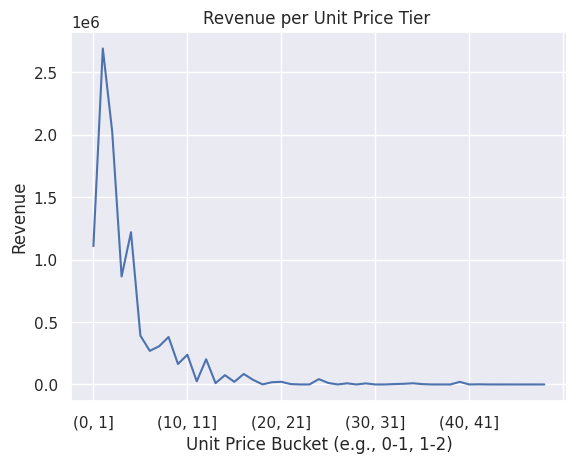

In [27]:
revenue_per_price.plot(kind='line')
plt.xlabel('Unit Price Bucket (e.g., 0-1, 1-2)')
plt.ylabel('Revenue')
plt.title('Revenue per Unit Price Tier ')
plt.show()

Step 8.4 Make it look nicer.

x-axis needs values.

y-axis isn't that easy to read; show in terms of millions.

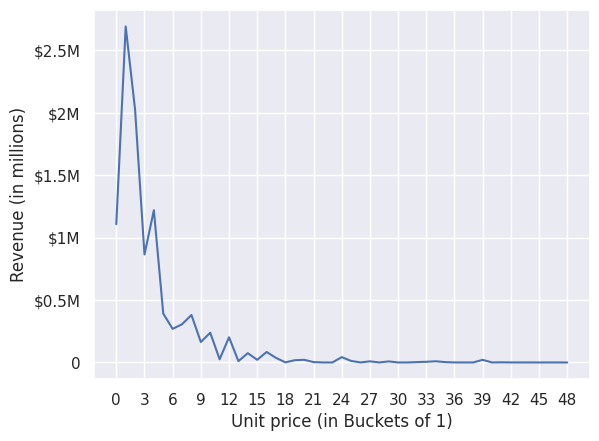

In [28]:
revenue_per_price.plot(kind='line')
plt.xlabel(f'Unit price (in Buckets of {price_interval})')
plt.ylabel('Revenue (in millions)')
plt.xticks(np.arange(price_start, price_end, 3), np.arange(price_start, price_end, 3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000], ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

##Scores

Step 1. Import the necessary libraries


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Step 2. Create the DataFrame it should look like below.


In [30]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73],
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}

In [31]:
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'female', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


Step 3. Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age


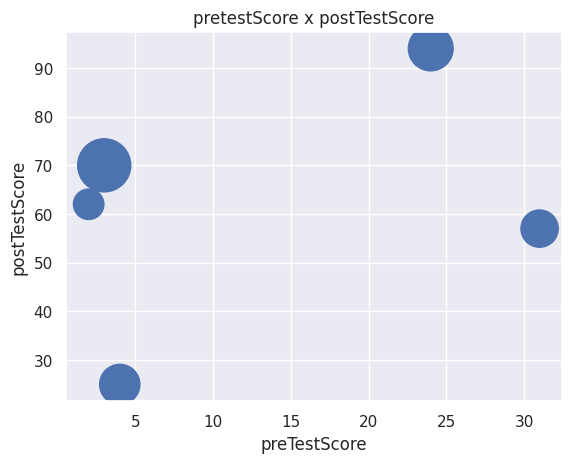

In [32]:
plt.scatter(df.preTestScore, df.postTestScore, s=df.age*20)
plt.title('pretestScore x postTestScore')
plt.xlabel('preTestScore')
plt.ylabel('postTestScore')
plt.show()

tep 4. Create a Scatterplot of preTestScore and postTestScore.
This time the size should be 4.5 times the postTestScore and the color determined by sex

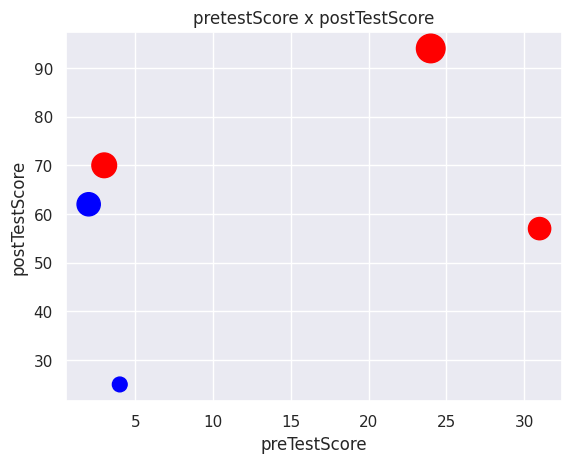

In [33]:
plt.scatter (df.preTestScore, df.postTestScore, s=df.postTestScore*4.5, c=df.female, cmap='bwr')

plt.title('pretestScore x postTestScore')
plt.xlabel('preTestScore')
plt.ylabel('postTestScore')
plt.show()
#

##Tips

Introduction:

This exercise was created based on the tutorial and documentation from Seaborn
The dataset being used is tips from Seaborn.

Step 1. Import the necessary libraries:

In [34]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('dark')

Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv).

Step 3. Assign it to a variable called tips

In [35]:
tips = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv')
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


Step 4. Delete the Unnamed 0 column


In [36]:
del tips['Unnamed: 0']
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Step 5. Plot the total_bill column histogram

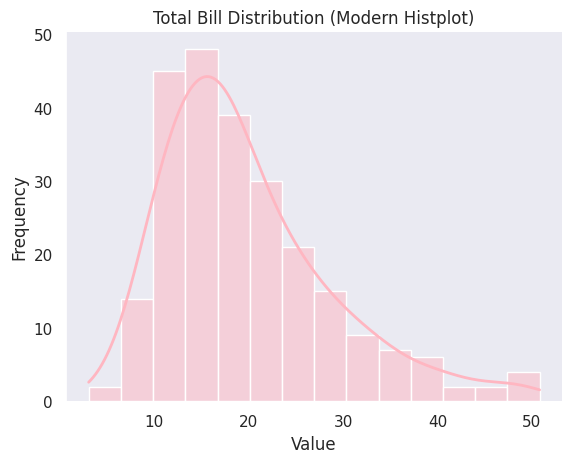

In [37]:
totalbill = sns.histplot(
    data = tips,
    x='total_bill',
    kde=True,
    color='lightpink',
    line_kws={'lw':2, 'color':'red'});

totalbill.set(
    xlabel='Value',
    ylabel='Frequency',
    title='Total Bill Distribution (Modern Histplot)'
    );
sns.despine(bottom=True)

Step 6. Create a scatter plot presenting the relationship between total_bill and tip


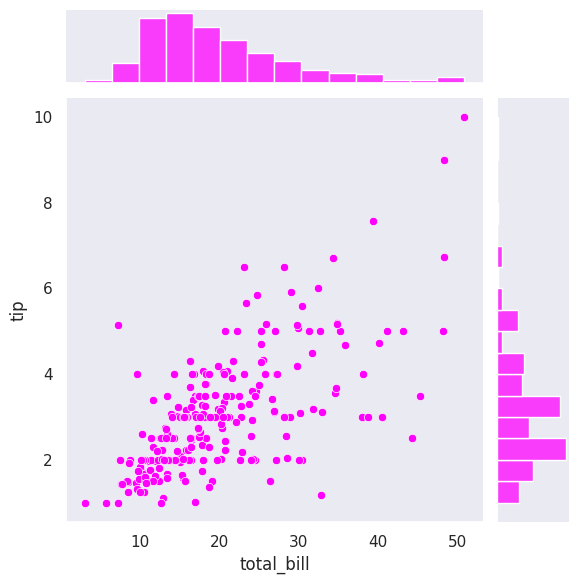

In [38]:
sns.jointplot(
    data=tips,
    x='total_bill',
    y='tip',
    kind='scatter',
    color='magenta'
)

Step 7. Create one image with the relationship of total_bill, tip and size.


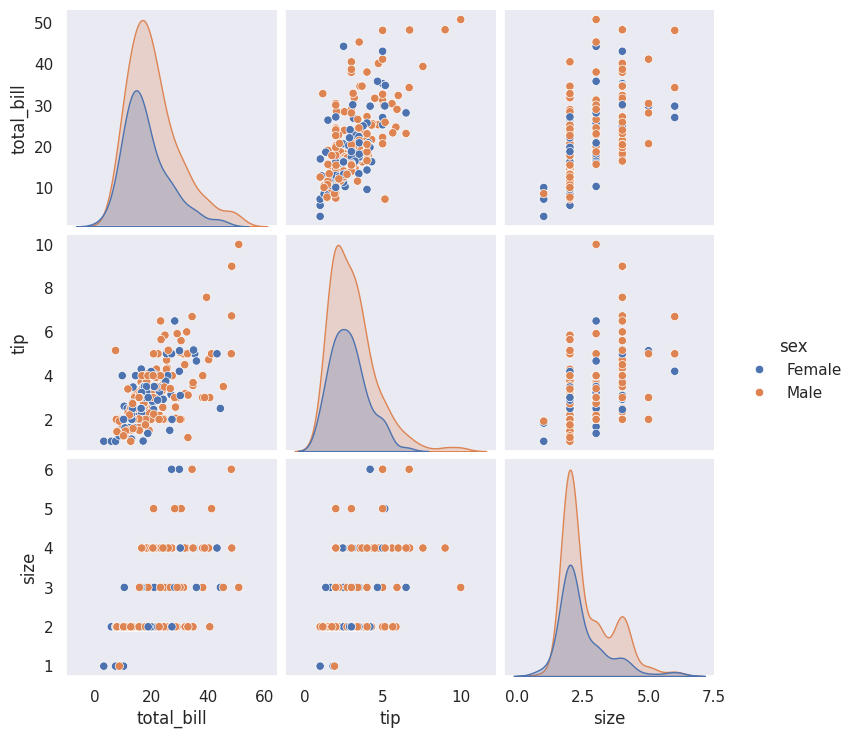

In [39]:
sns.pairplot(tips, hue='sex') #A pair plot (or scatter plot matrix) is a high-level function from the Seaborn library used to visualize the pairwise relationships between all columns in a DataFrame (or a subset of th

Step 8. Present the relationship between days and total_bill value

<Axes: xlabel='day', ylabel='total_bill'>

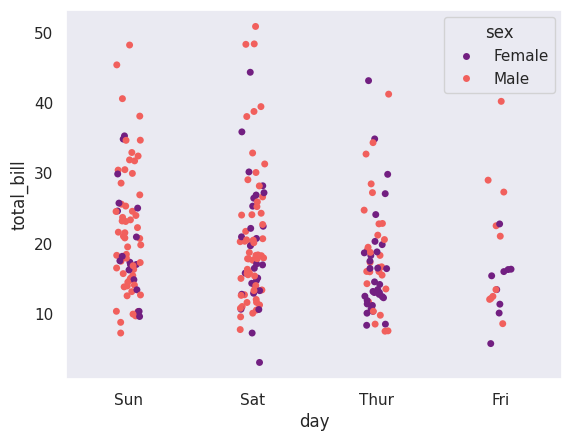

In [40]:
sns.stripplot(
    x='day',
    y='total_bill',
    data = tips,
    jitter=True,
    hue='sex',
    palette='magma'
) #jitter prevents overplotting without it most of the points would overlap and look like athick line

Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex


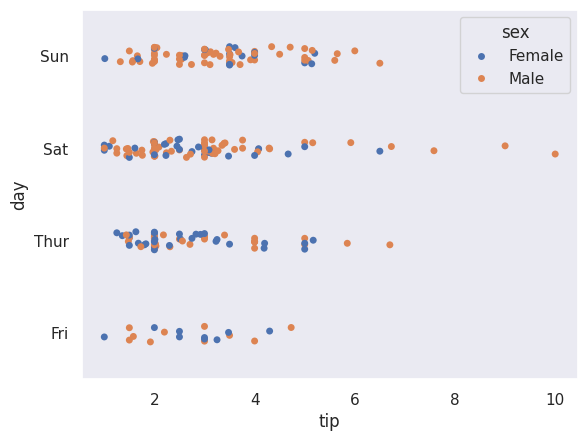

In [41]:
sns.stripplot(
    x='tip',
    y='day',
    data=tips,
    jitter=True,
    hue='sex');

Step 10. Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)


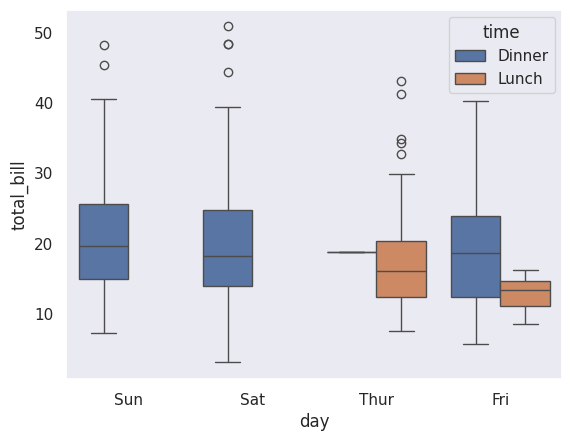

In [42]:
sns.boxplot(
    x='day',
    y='total_bill',
    data=tips,
    hue='time',

);


Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.


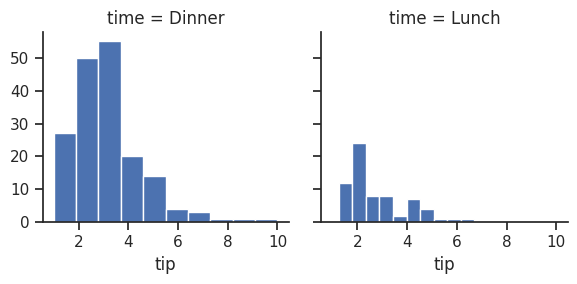

In [43]:
sns.set(style='ticks')
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, 'tip')

Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker

They must be side by side.

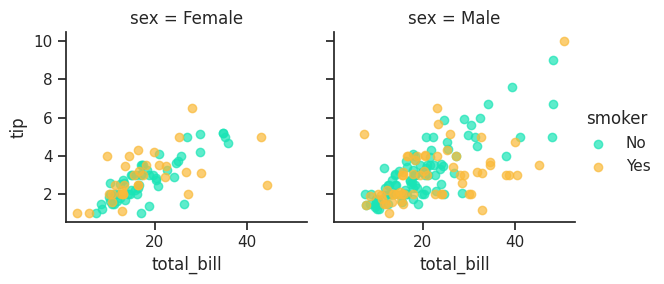

In [44]:
g = sns.FacetGrid(
    data=tips,
    col='sex',
    hue='smoker',
    palette='turbo')
g.map(plt.scatter, 'total_bill', 'tip', alpha=0.7)
g.add_legend()

##Visualizing the Titanic Disaster

**Introduction:**

This exercise is based on the titanic Disaster dataset avaiable at Kaggle.
To know more about the variables check here

Step 1. Import the necessary libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


Step 2. Import the dataset from this address


Step 3. Assign it to a variable titanic


In [46]:
titanic = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Disaster/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 4. Set PassengerId as the index


In [47]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 5. Create a pie chart presenting the male/female proportion


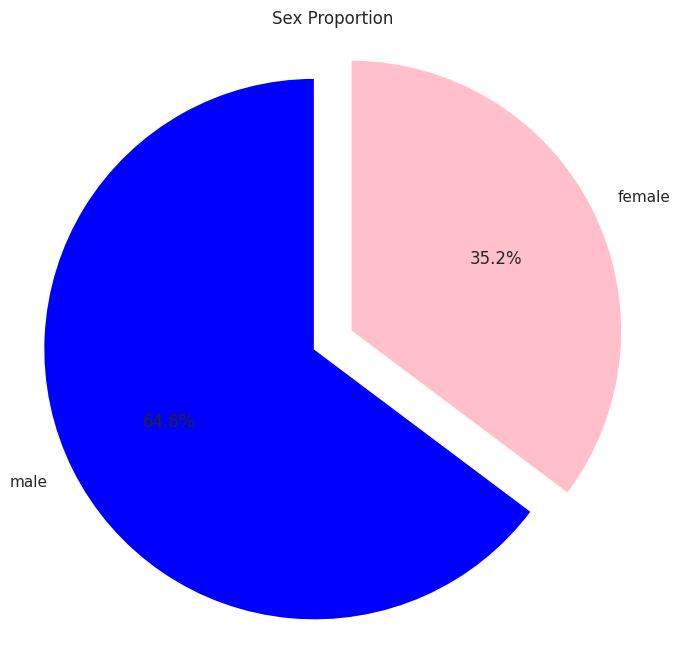

In [48]:
proportions_series = titanic.Sex.value_counts()
# 2. Plot the Series using the built-in Pandas .plot() method
# This is equivalent to calling plt.pie() but is more concise
proportions_series.plot(
    kind='pie',
    labels = proportions_series.index.to_list(),
    colors = ['blue', 'pink'],
    explode = (0.15, 0),
    autopct = '%1.1f%%',
    shadow=False,
    startangle=90,
    figsize=(8, 8)
)
# 3. Final Matplotlib adjustments
plt.title("Sex Proportion")
plt.ylabel('') # Hides the default y-label ('Sex') from the Series plot
plt.axis('equal') # Ensures the pie is a circle
plt.show()

Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender


(-5.0, 85.0)

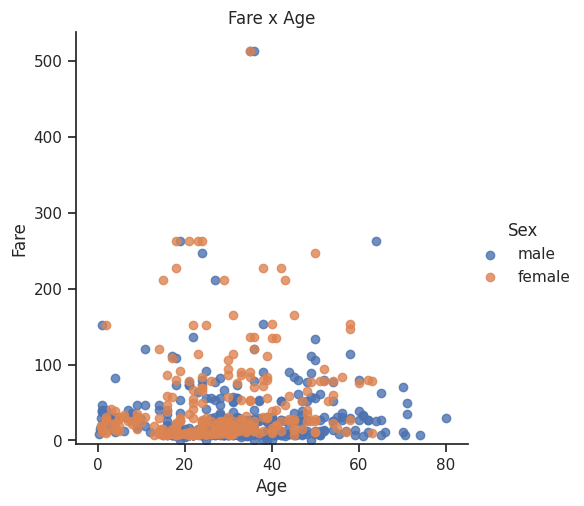

In [49]:
lm = sns.lmplot(
    x='Age',
    y='Fare',
    data=titanic,
    hue='Sex',
    fit_reg=False
    );
lm.set(title='Fare x Age')

axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5, 85)

Step 7. How many people survived?


In [50]:
titanic.Survived.value_counts()

,count
Survived,
0,549
1,342


Step 8. Create a histogram with the Fare payed


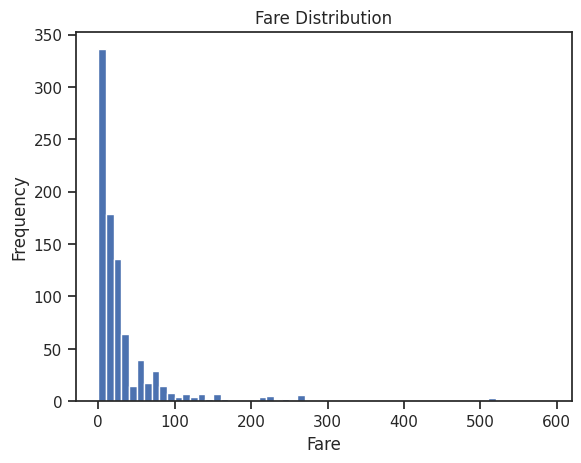

In [51]:
df = titanic.Fare.sort_values(ascending=False)
binsVals = np.arange(0, 600, 10)
binsVals

plt.hist(df, bins=binsVals);
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()